# Upper Confidence Bound (UCB)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

file_path = '/content/drive/My Drive/AI-projects-lab/ml-datasets/Ads_CTR_Optimisation.csv'
dataset = pd.read_csv(file_path)

Mounted at /content/drive


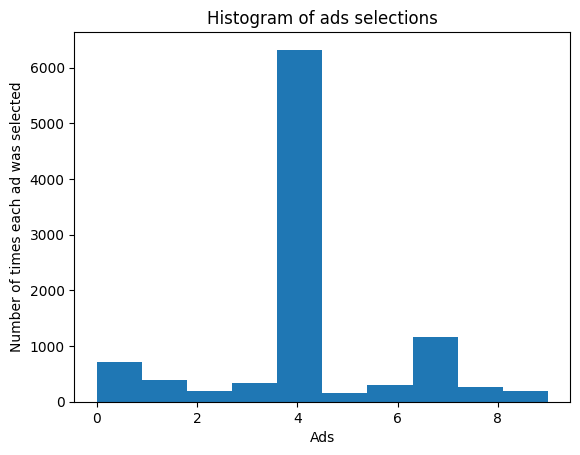

In [4]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Thompson Sampling

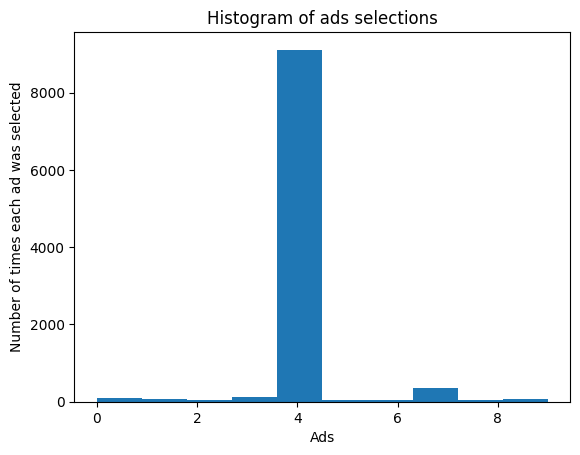

In [5]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()